# Training to Spot Fake News
## Research Question
Is training developed to innoculate people against fake news effective? We ran an experiment that tested two training methods designed to help people spot fake news.
## Method
Partipcants were randomly assigned to one of three conditions. Participants in the first condition played the [Bad News Game](https://getbadnews.com/#intro) designed to "vaccinate the world against disinformation". Participants assigned to the second condition watched a [video](https://www.factcheck.org/2016/12/video-spotting-fake-news/) "How to Spot Fake News" cretaed by [factcheck.org](https://www.factcheck.org/). A third condition served as a control condition.

Participants were then asked to classify 20 articles into one of five categories: fake news, satire, extreme bias, political, or credible.  


## Load Libraries and Packages

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Extract, Transform, Load 
Take original Qualtircs csv file, remove rejected subjects, complete transformations, save clean data .csv file

### Variable Description
ID: Subject ID (mTurk ID)

Cond: Assigned experimental condition. 
T1=Training Game, 
T2=Training video, 
C=Control(no training)

Sex: 1-Male; 2-Female; 3-Other/Prefer not to answer

Age: In years

Art01-Art20: For Article 1-20. Category assigned by participant to article
1- Satire: humor, irony, exaggeration, ridicule, and false information to comment on current events. 
2- Fake News: fabricate information, disseminate deceptive content/grossly distort actual news reports
3- Extreme Bias: may rely on propaganda, decontextualized info, opinions distorted as facts  
4- Political: generally verifiable info in support of certain points of view/political orientations
5- Credible: consistent with traditional and ethical practices in journalism

Cor01-Cor20: For Article 1-20. '1' if assigned correctly, '0' incorrect as assigned by subject 

TotCor: Total correct out of 20 articles classified. 

In [3]:
# Read in original Qualtrics .csv file.
df_raw = pd.read_csv('data/Spot Fake News_July 28, 2019_13.40.csv', skiprows=[1,2])

In [4]:
# Remove rejected responses from data
df_raw = df_raw[df_raw.Consent != 2] # Take out surveys where participant did not consent
df_raw = df_raw[df_raw.Finished != 0] # Take out incomplete surveys
df_raw = df_raw[df_raw.mTurkID != 'asd'] # Non-sensical text responses/incorrect completion code
df_raw = df_raw[df_raw.mTurkID != 'A1TXOZQU1O4F0N'] # Response not in mTurk
df_raw = df_raw[df_raw.mTurkID != 'A5LYLHG880ABE'] # Worker repeated survey
df_raw = df_raw[df_raw.mTurkID != 'AZM3H44W1D65P'] # Response not in mTurk
df_raw = df_raw[df_raw.mTurkID != 'A1YC558J4E5KZ'] # Worker repeated survey
df_raw = df_raw[df_raw.mTurkID != 'AK2C9AX5QJWUU'] # Incorrect completion code
df_raw = df_raw[df_raw.mTurkID != 'A110KENBXU7SUJ'] # Incorrect completion code
df_raw = df_raw[df_raw.mTurkID != 'AJ60KRY0FTB1F'] # Incorrect completion code

In [5]:
# Create data frame for cleaned data
col_names = ['ID','Cond','Sex','Age','Pol',\
             'Art01','Art02','Art03','Art04','Art05','Art06','Art07','Art08','Art09','Art10',\
             'Art11','Art12','Art13','Art14','Art15','Art16','Art17','Art18','Art19','Art20',\
             'Cor01','Cor02','Cor03','Cor04','Cor05','Cor06','Cor07','Cor08','Cor09','Cor10',\
             'Cor11','Cor12','Cor13','Cor14','Cor15','Cor16','Cor17','Cor18','Cor19','Cor20','TotCor','Per']
df_clean = pd.DataFrame(columns=col_names)

In [6]:
# Transfer Demographic variables
df_clean.ID = df_raw.mTurkID
df_clean.Cond = df_raw.Condition
df_clean.Sex = df_raw.sex
df_clean.Age = df_raw.age_1_TEXT
df_clean.at[130, 'Age'] = 27 # Correct original entry of '1992' to '27'
df_clean.at[188, 'Age'] = 25 # Convert original entry of '1994' to '25'
df_clean.Pol = df_raw.politic

In [7]:
# Create variable for subject's choice of article categorization
df_clean.Art01 = df_raw.Article01
df_clean.Art02 = df_raw.Article02
df_clean.Art03 = df_raw.Article03
df_clean.Art04 = df_raw.Article04
df_clean.Art05 = df_raw.Article05
df_clean.Art06 = df_raw.Article06
df_clean.Art07 = df_raw.Article07
df_clean.Art08 = df_raw.Article08
df_clean.Art09 = df_raw.Article09
df_clean.Art10 = df_raw.Article10
df_clean.Art11 = df_raw.Article11
df_clean.Art12 = df_raw.Article12
df_clean.Art13 = df_raw.Article13
df_clean.Art14 = df_raw.Article14
df_clean.Art15 = df_raw.Article15
df_clean.Art16 = df_raw.Article16
df_clean.Art17 = df_raw.Article17
df_clean.Art18 = df_raw.Article18
df_clean.Art19 = df_raw.Article19
df_clean.Art20 = df_raw.Article20

In [8]:
# Create variable records if article coded correctly and Total number articles coded correctly
# 1: Correctly Coded. 0: Incorrectly Coded
df_clean.Cor01 = np.where(df_raw.Article01==2, 1, 0)
df_clean.Cor02 = np.where(df_raw.Article02==2, 1, 0)
df_clean.Cor03 = np.where(df_raw.Article03==2, 1, 0)
df_clean.Cor04 = np.where(df_raw.Article04==2, 1, 0)
df_clean.Cor05 = np.where(df_raw.Article05==2, 1, 0)
df_clean.Cor06 = np.where(df_raw.Article06==2, 1, 0)
df_clean.Cor07 = np.where(df_raw.Article07==2, 1, 0)
df_clean.Cor08 = np.where(df_raw.Article08==2, 1, 0)
df_clean.Cor09 = np.where(df_raw.Article09==1, 1, 0)
df_clean.Cor10 = np.where(df_raw.Article10==1, 1, 0)
df_clean.Cor11 = np.where(df_raw.Article11==1, 1, 0)
df_clean.Cor12 = np.where(df_raw.Article12==3, 1, 0)
df_clean.Cor13 = np.where(df_raw.Article13==3, 1, 0)
df_clean.Cor14 = np.where(df_raw.Article14==3, 1, 0)
df_clean.Cor15 = np.where(df_raw.Article15==4, 1, 0)
df_clean.Cor16 = np.where(df_raw.Article16==4, 1, 0)
df_clean.Cor17 = np.where(df_raw.Article17==4, 1, 0)
df_clean.Cor18 = np.where(df_raw.Article18==5, 1, 0)
df_clean.Cor19 = np.where(df_raw.Article19==5, 1, 0)
df_clean.Cor20 = np.where(df_raw.Article20==5, 1, 0)
df_clean.TotCor = df_clean.Cor01+df_clean.Cor02+df_clean.Cor03+df_clean.Cor04+df_clean.Cor05+\
    df_clean.Cor06+df_clean.Cor07+df_clean.Cor08+df_clean.Cor09+df_clean.Cor10+df_clean.Cor11+\
    df_clean.Cor12+df_clean.Cor13+df_clean.Cor14+df_clean.Cor15+df_clean.Cor16+df_clean.Cor17+\
    df_clean.Cor18+df_clean.Cor19+df_clean.Cor20
df_clean.Per = (df_clean.TotCor/20)

In [9]:
# Save clean data file to .csv
df_clean.to_csv("data/CleanExpData.csv")

## Hypothesis Test
Are training methods effective in helping people identify and classify fake , biased, and legitimate news?

H0: TotCor<sub>Control</sub> = TotCor<sub>T1</sub> = TotCor<sub>T2</sub>

H1: TotCor<sub>Control</sub> != TotCor<sub>T1</sub> != TotCor<sub>T2</sub>

Based on the data, the null hypothesis can not be rejected. We did not observe a significant effect of training on people's ability to appropriately label news articles.

In [2]:
# Load Data File
datafile = "data/CleanExpData.csv"
data = pd.read_csv(datafile)

In [5]:
# Calculate Descriptive Stats
## Overall performance: Classifying 20 articles correctly
print('Articles classified correctly out of 20')
print()
print('Overall: ','N =',data.TotCor.count(),'M =',data.TotCor.mean(),'SD =',\
      data.TotCor.std())
##Control Performance
Control_Check = data['Cond'] =='C'
Control = data[Control_Check]
print('Control: ','N =',Control.TotCor.count(),'M =',Control.TotCor.mean(),'SD =',\
      Control.TotCor.std())
## T1 (Game) Performance
T1_Check = data['Cond'] =='T1'
T1 = data[T1_Check] 
print('T1 (Game): ','N =',T1.TotCor.count(),'M =',T1.TotCor.mean(),'SD =',T1.TotCor.std())

#T2 (Video) Performance
T2_Check = data['Cond'] =='T2'
T2 = data[T2_Check] 
print('T2 (Video): ','N =',T2.TotCor.count(),'M =',T2.TotCor.mean(),'SD =',T2.TotCor.std())

Articles classified correctly out of 20

Overall:  N = 291 M = 7.958762886597938 SD = 3.047613625297768
Control:  N = 94 M = 8.106382978723405 SD = 3.060213237023075
T1 (Game):  N = 96 M = 7.677083333333333 SD = 3.076206795001603
T2 (Video):  N = 101 M = 8.089108910891088 SD = 3.020261610857543


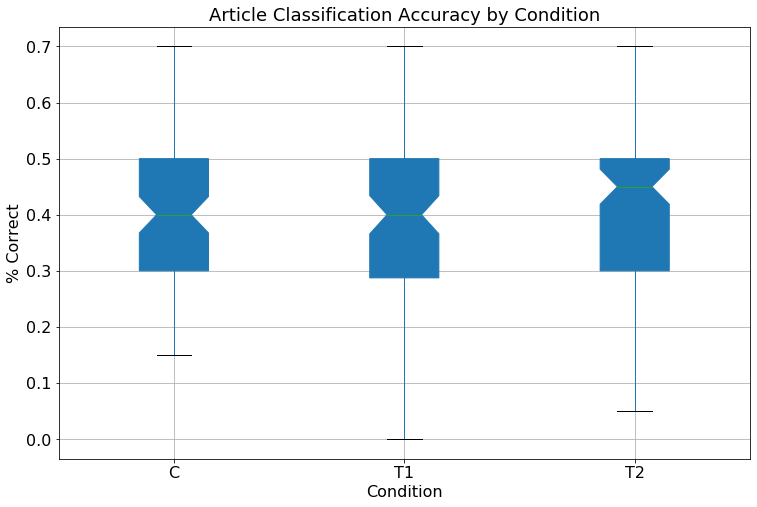

In [6]:
# Create Box Plot
bplot1 = data.boxplot('Per', by='Cond', notch=True, patch_artist=True, figsize=(12,8), fontsize=16)
#plt.xticks(['C','T1','T2'],['C','G','V'])
plt.title('Article Classification Accuracy by Condition', fontsize=18)
plt.ylabel('% Correct', fontsize=16)
plt.xlabel('Condition', fontsize=16)
plt.suptitle("") # Supress automatic title
plt.show()

In [7]:
# Perform ANOVA test
ctrl = data['TotCor'][data.Cond == 'C']
grps = pd.unique(data.Cond.values)
d_data = {grp:data['TotCor'][data.Cond == grp] for grp in grps}

k = len(pd.unique(data.Cond))  # number of conditions
N = len(data.values)  # conditions times participants
n = data.groupby('Cond').size()[0] #Participants in each condition
a = .05 # set the significance level

F, p = stats.f_oneway(d_data['C'], d_data['T1'], d_data['T2'])
print('F(',k-1,',',N-k,') = ',F,' p =',p)
if p < a:
    print('Reject the Null Hypothesis')
else: 
    print('Fail to reject the null hypothesis')

F( 2 , 288 ) =  0.6110526748256431  p = 0.5434813683496551
Fail to reject the null hypothesis


## Exploratory Data Analysis

In [8]:
#Function to Draw Single Bar Chart of article ratings
def Rating_BarChart(art):
    plt.style.use('ggplot')
    x=['Satire','Fake News','Biased','Political','Legitimate']
    ser = art.value_counts() 
    counts=[ser[1],ser[2],ser[3],ser[4],ser[5]]
    x_pos = [i for i, _ in enumerate(x)]
    plt.bar(x_pos, counts, color='green')
    plt.xlabel("News Label")
    plt.ylabel("Count")
    plt.title('Article Classification')
    plt.xticks(x_pos, x)
    plt.show()

In [14]:
# Function to Draw Bar Chart w/ nultiple X's
def MultBarChart(x1, x2, x1_lab, x2_lab, title, x1_color='red', x2_color='dodgerblue'): 
    N=5               
    x1_counts = []
    x2_counts = []
    i=1
    while i < 6:
        try: 
            x1_counts.append(x1[i])
        except:
            x1_counts.append(0)
        try:
            x2_counts.append(x2[i])
        except:
            x2_counts.append(0)
        i=i+1

    ind = np.arange(N) 
    width = 0.35       
    plt.bar(ind, x1_counts, width, label=x1_lab, color=x1_color)
    plt.bar(ind + width, x2_counts, width, label=x2_lab, color =x2_color)
    plt.ylabel('Counts')
    plt.title(title)

    plt.xticks(ind + width / 2, ('Satire', 'Fake News', 'Biased', 'Political', 'Legitimate'))
    plt.legend(loc='best')
    plt.show()
    

In [93]:
# Split data along political lines (conservative/liberal)
VCon = data[data.Pol == 1] # Isolate Very Conservative Subjects
SCon = data[data.Pol == 2] # Isolate Somewhat Conservative Subjects
Frames_Con = [VCon, SCon] # Join Very Conservative and Somewhat Conservative.
data_con = pd.concat(Frames_Con)

SLib = data[data.Pol == 4] # Isolate Somewhat Liberal Subjects
VLib = data[data.Pol == 5] # Isolate Very Liberal Subjects
Frames_Lib = [SLib, VLib] # Join Very Liberal and Somewhat Liberal
data_lib = pd.concat(Frames_Lib)

print("Conservatives: N=",len(data_con),"Mean=",data_con.TotCor.mean())
print("Liberals: N=",len(data_lib),"Mean=",data_lib.TotCor.mean())

Conservatives: N= 71 Mean= 7.380281690140845
Liberals: N= 166 Mean= 8.409638554216867


In [94]:
# Split data along gender (Male / Female)
data_M = data[data.Sex == 1]
data_F = data[data.Sex ==2]
print("Males: N=",len(data_M),"Mean=",data_M.TotCor.mean())
print("Females: N=",len(data_F),"Mean=",data_F.TotCor.mean())

Males: N= 160 Mean= 8.24375
Females: N= 129 Mean= 7.635658914728682


### Article 1: "Alabama declares flu outbreak emergency as vaccine failure becomes obvious to everyone" (Fake News)

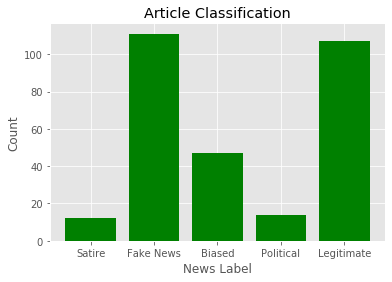

In [12]:
Rating_BarChart(data.Art01)

In [41]:
print("Mean Legitimacy")
print("Conservatives: ",data_con.Art01.mean())
print("Liberals: ",data_lib.Art01.mean())
print("    ",stats.ttest_ind(data_con.Art01, data_lib.Art01))
print("Males: ",data_M.Art01.mean())
print("Females: ",data_F.Art01.mean())
print("    ",stats.ttest_ind(data_M.Art01, data_F.Art01))

Mean Legitimacy
Conservatives:  3.436619718309859
Liberals:  3.1686746987951806
     Ttest_indResult(statistic=1.355355553704053, pvalue=0.17660554543599613)
Males:  3.1375
Females:  3.5193798449612403
     Ttest_indResult(statistic=-2.320374339273371, pvalue=0.021021778155972105)


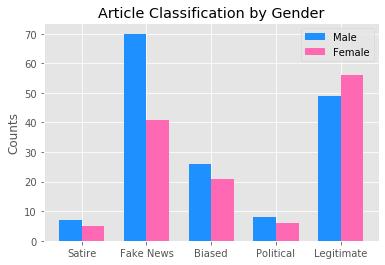

In [77]:
MultBarChart(data_M.Art01.value_counts(), data_F.Art01.value_counts(), 'Male', 'Female', \
             'Article Classification by Gender', x1_color='dodgerblue', x2_color='hotpink')

### Article 2: "After 8 Years with Obama, Iran Protesters Reveal What Trump’s Support Means to Them As They Prepare to Die for Regime Change" (Fake News)

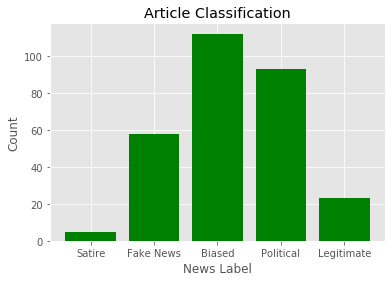

In [208]:
Rating_BarChart(data.Art02)

In [44]:
print("Mean Legitimacy")
print("Conservatives: ",data_con.Art02.mean())
print("Liberals: ",data_lib.Art02.mean())
print("    ",stats.ttest_ind(data_con.Art02, data_lib.Art02))
print("Males: ",data_M.Art02.mean())
print("Females: ",data_F.Art02.mean())
print("    ",stats.ttest_ind(data_M.Art02, data_F.Art02))

Mean Legitimacy
Conservatives:  3.5211267605633805
Liberals:  3.13855421686747
     Ttest_indResult(statistic=3.0200879363160182, pvalue=0.0028061337454505547)
Males:  3.3
Females:  3.1705426356589146
     Ttest_indResult(statistic=1.1868995908309963, pvalue=0.2362487305487417)


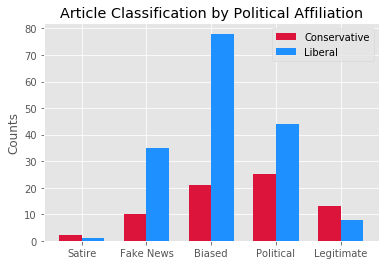

In [95]:
MultBarChart(data_con.Art02.value_counts(), data_lib.Art02.value_counts(), 'Conservative', 'Liberal', \
             'Article Classification by Political Affiliation')

### Article 3: "Google, Facebook, Twitter and Communist China Are Assigning a Threat Matrix Score to All Internet Users" (Fake News)

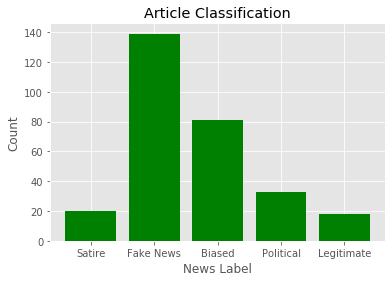

In [196]:
Rating_BarChart(data.Art03)

In [46]:
print("Mean Legitimacy")
print("Conservatives: ",data_con.Art03.mean())
print("Liberals: ",data_lib.Art03.mean())
print("    ",stats.ttest_ind(data_con.Art03, data_lib.Art03))
print("Males: ",data_M.Art03.mean())
print("Females: ",data_F.Art03.mean())
print("    ",stats.ttest_ind(data_M.Art03, data_F.Art03))

Mean Legitimacy
Conservatives:  2.6901408450704225
Liberals:  2.5481927710843375
     Ttest_indResult(statistic=1.0385993430341198, pvalue=0.30005854719386493)
Males:  2.55625
Females:  2.7131782945736433
     Ttest_indResult(statistic=-1.3429540426744484, pvalue=0.18034793080673123)


### Article 4: "Doctors Warn: Avoid Genetically Modified Food" (Fake News)

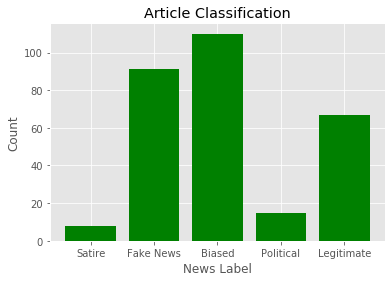

In [198]:
Rating_BarChart(data.Art04)

In [47]:
print("Mean Legitimacy")
print(" Conservatives: ",data_con.Art04.mean())
print(" Liberals: ",data_lib.Art04.mean())
print("    ",stats.ttest_ind(data_con.Art04, data_lib.Art04))
print(" Males: ",data_M.Art04.mean())
print(" Females: ",data_F.Art04.mean())
print("    ",stats.ttest_ind(data_M.Art04, data_F.Art04))

Mean Legitimacy
Conservatives:  3.183098591549296
Liberals:  3.0180722891566263
     Ttest_indResult(statistic=1.0139577694632107, pvalue=0.3116457145987037)
Males:  3.00625
Females:  3.310077519379845
     Ttest_indResult(statistic=-2.206621312021015, pvalue=0.02813229776296274)


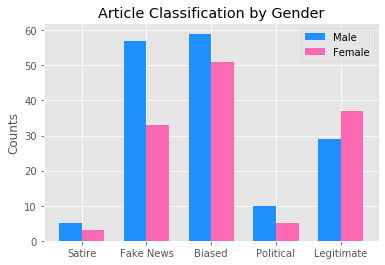

In [76]:
MultBarChart(data_M.Art04.value_counts(), data_F.Art04.value_counts(), 'Male', 'Female', \
             'Article Classification by Gender', x1_color='dodgerblue', x2_color='hotpink')

### Article 5: "Justice Department Dives Into Hillary Clinton Emails Again!" (Fake News)

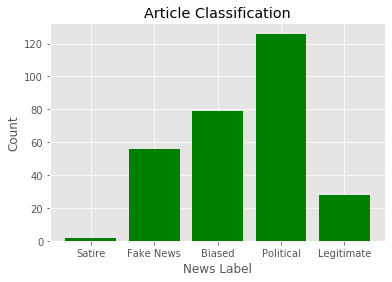

In [73]:
Rating_BarChart(data.Art05)

In [49]:
print("Mean Legitimacy")
print("Conservatives: ",data_con.Art05.mean())
print("Liberals: ",data_lib.Art05.mean())
print("    ",stats.ttest_ind(data_con.Art05, data_lib.Art05))
print("Males: ",data_M.Art05.mean())
print("Females: ",data_F.Art05.mean())
print("    ",stats.ttest_ind(data_M.Art05, data_F.Art05))

Mean Legitimacy
Conservatives:  3.507042253521127
Liberals:  3.2710843373493974
     Ttest_indResult(statistic=1.7663421937584567, pvalue=0.07863672630409149)
Males:  3.3125
Females:  3.5426356589147288
     Ttest_indResult(statistic=-2.0990307809899758, pvalue=0.03668766982550063)


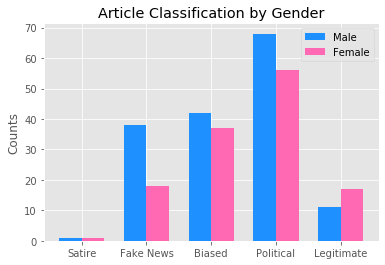

In [75]:
MultBarChart(data_M.Art05.value_counts(), data_F.Art05.value_counts(), 'Male', 'Female', \
             'Article Classification by Gender', x1_color='dodgerblue', x2_color='hotpink')

### Article 6: "Amanda Bynes Tweets About Father’s Abuse and Microchip in Her Brain; Now Under Involuntary Psychiatric Hold" (Fake News)

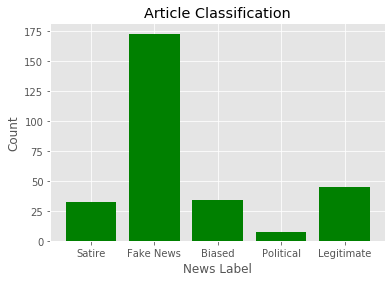

In [74]:
Rating_BarChart(data.Art06)

In [52]:
print("Mean Legitimacy")
print("Conservatives: ",data_con.Art06.mean())
print("Liberals: ",data_lib.Art06.mean())
print("    ",stats.ttest_ind(data_con.Art06, data_lib.Art06))
print("Males: ",data_M.Art06.mean())
print("Females: ",data_F.Art06.mean())
print("    ",stats.ttest_ind(data_M.Art06, data_F.Art06))

Mean Legitimacy
Conservatives:  2.6338028169014085
Liberals:  2.427710843373494
     Ttest_indResult(statistic=1.2243821389772138, pvalue=0.2220341017818464)
Males:  2.425
Females:  2.635658914728682
     Ttest_indResult(statistic=-1.4769683966834088, pvalue=0.14078053732877013)


### Article 7: "The mounting death toll of Obama's political enemies..." (Fake News)

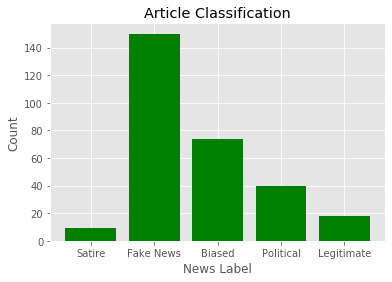

In [75]:
Rating_BarChart(data.Art07)

In [53]:
print("Mean Legitimacy")
print("Conservatives: ",data_con.Art07.mean())
print("Liberals: ",data_lib.Art07.mean())
print("    ",stats.ttest_ind(data_con.Art07, data_lib.Art07))
print("Males: ",data_M.Art07.mean())
print("Females: ",data_F.Art07.mean())
print("    ",stats.ttest_ind(data_M.Art07, data_F.Art07))

Mean Legitimacy
Conservatives:  2.8450704225352115
Liberals:  2.5421686746987953
     Ttest_indResult(statistic=2.3600908381903785, pvalue=0.019088768894499283)
Males:  2.6375
Females:  2.75968992248062
     Ttest_indResult(statistic=-1.0755945253341155, pvalue=0.28301200315410385)


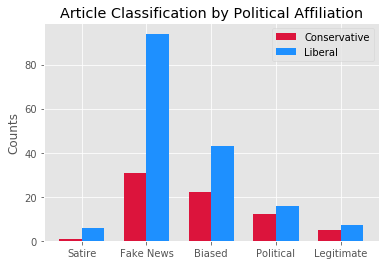

In [78]:
MultBarChart(data_con.Art07.value_counts(), data_lib.Art07.value_counts(), 'Conservative', 'Liberal', \
             'Article Classification by Political Affiliation')

### Article 8: Julian Assange Isn’t Done With Hillary, Reveals Hidden Human Trafficking Network" (Fake News)

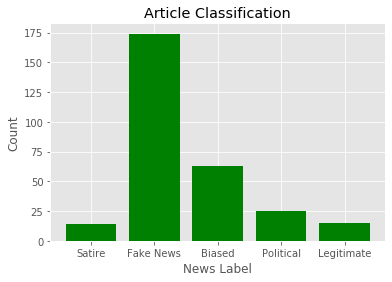

In [76]:
Rating_BarChart(data.Art08)

In [54]:
print("Mean Legitimacy")
print("Conservatives: ",data_con.Art08.mean())
print("Liberals: ",data_lib.Art08.mean())
print("    ",stats.ttest_ind(data_con.Art08, data_lib.Art08))
print("Males: ",data_M.Art08.mean())
print("Females: ",data_F.Art08.mean())
print("    ",stats.ttest_ind(data_M.Art08, data_F.Art08))

Mean Legitimacy
Conservatives:  2.591549295774648
Liberals:  2.4578313253012047
     Ttest_indResult(statistic=1.0315885638555042, pvalue=0.30332540028543215)
Males:  2.45
Females:  2.5426356589147288
     Ttest_indResult(statistic=-0.8603747997213678, pvalue=0.39030062376342955)


In [21]:
print("Mean Legitimacy... Conservatives: ",data_con.Art08.mean(), "Liberals: ",data_lib.Art08.mean())
print(stats.ttest_ind(data_con.Art08, data_lib.Art08))

Mean Legitimacy... Conservatives:  2.591549295774648 Liberals:  2.4578313253012047
Ttest_indResult(statistic=1.0315885638555042, pvalue=0.30332540028543215)


### Article 9: "Serendipity: This Man Made Up An Entire Personality For His Regular Barista, And She’s Perfect For Him" (Satire)

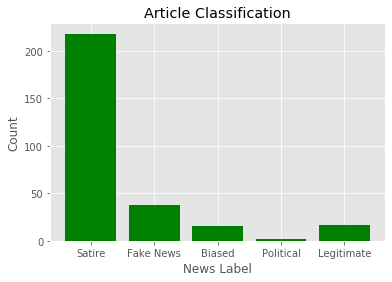

In [77]:
Rating_BarChart(data.Art09)

In [68]:
print("Mean Legitimacy")
print(" Conservatives: ",data_con.Art09.mean())
print(" Liberals: ",data_lib.Art09.mean())
print("    ",stats.ttest_ind(data_con.Art09, data_lib.Art09))
print(" Males: ",data_M.Art09.mean())
print(" Females: ",data_F.Art09.mean())
print("    ",stats.ttest_ind(data_M.Art09, data_F.Art09))

Mean Legitimacy
 Conservatives:  1.4647887323943662
 Liberals:  1.4397590361445782
     Ttest_indResult(statistic=0.17232077161037404, pvalue=0.8633336660939293)
 Males:  1.51875
 Females:  1.4573643410852712
     Ttest_indResult(statistic=0.4928650933509148, pvalue=0.6224847784518706)


### Article 10: "Centrelink Caller Qualifies for Aged Pension While On Hold" (Satire)

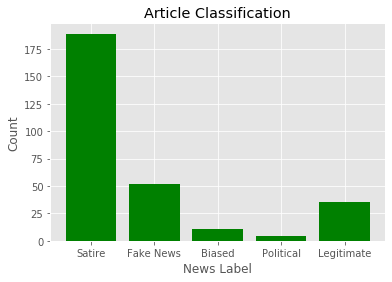

In [40]:
Rating_BarChart(data.Art10)

In [56]:
print("Mean Legitimacy")
print(" Conservatives: ",data_con.Art10.mean())
print(" Liberals: ",data_lib.Art10.mean())
print("    ",stats.ttest_ind(data_con.Art10, data_lib.Art10))
print(" Males: ",data_M.Art10.mean())
print(" Females: ",data_F.Art10.mean())
print("    ",stats.ttest_ind(data_M.Art10, data_F.Art10))

Mean Legitimacy
Conservatives:  1.8450704225352113
Liberals:  1.680722891566265
     Ttest_indResult(statistic=0.8935154346707039, pvalue=0.37249533137384216)
Males:  1.76875
Females:  1.7596899224806202
     Ttest_indResult(statistic=0.057664169887330065, pvalue=0.9540562611701305)


### Article 11: "Experts Find Censoring Lyrics In Teenage Dirtbag Did Little To Prevent School Shootings" (Satire)

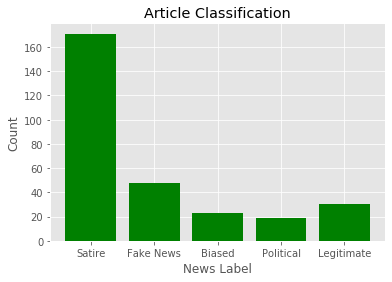

In [79]:
Rating_BarChart(data.Art11)

In [71]:
print("Mean Legitimacy")
print(" Conservatives: ",data_con.Art11.mean())
print(" Liberals: ",data_lib.Art11.mean())
print("    ",stats.ttest_ind(data_con.Art11, data_lib.Art11))
print(" Males: ",data_M.Art11.mean())
print(" Females: ",data_F.Art11.mean())
print("    ",stats.ttest_ind(data_M.Art11, data_F.Art11))

Mean Legitimacy
 Conservatives:  2.112676056338028
 Liberals:  1.6686746987951808
     Ttest_indResult(statistic=2.4890199307214633, pvalue=0.013502913142475436)
 Males:  1.84375
 Females:  2.0310077519379846
     Ttest_indResult(statistic=-1.1634609241238003, pvalue=0.24560891576577742)


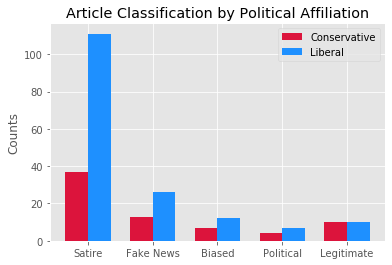

In [70]:
MultBarChart(data_con.Art11.value_counts(), data_lib.Art11.value_counts(), 'Conservative', 'Liberal', \
             'Article Classification by Political Affiliation')

### Article 12: "Biggest pro-life goal: Defunding abortionists" (High Bias)

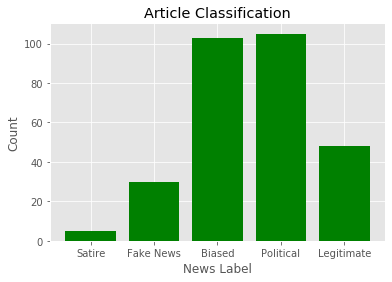

In [80]:
Rating_BarChart(data.Art12)

In [72]:
print("Mean Legitimacy")
print(" Conservatives: ",data_con.Art12.mean())
print(" Liberals: ",data_lib.Art12.mean())
print("    ",stats.ttest_ind(data_con.Art12, data_lib.Art12))
print(" Males: ",data_M.Art12.mean())
print(" Females: ",data_F.Art12.mean())
print("    ",stats.ttest_ind(data_M.Art12, data_F.Art12))

Mean Legitimacy
 Conservatives:  3.6056338028169015
 Liberals:  3.5903614457831323
     Ttest_indResult(statistic=0.11528259752047768, pvalue=0.9083195756023155)
 Males:  3.44375
 Females:  3.682170542635659
     Ttest_indResult(statistic=-2.144042949592805, pvalue=0.03286944782512444)


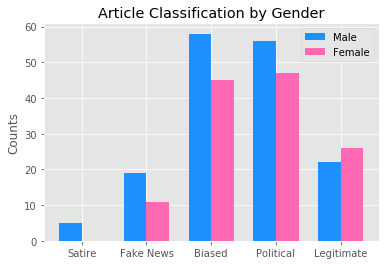

In [79]:
MultBarChart(data_M.Art12.value_counts(), data_F.Art12.value_counts(), 'Male', 'Female', \
             'Article Classification by Gender', x1_color='dodgerblue', x2_color='hotpink')

### Article 13: "Judge Tosses NAACP Lawsuit Against Arizona Ban on Race-Based Abortions" (High Bias)

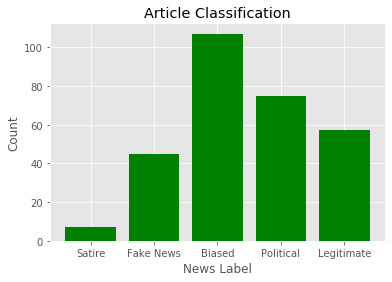

In [81]:
Rating_BarChart(data.Art13)

In [80]:
print("Mean Legitimacy")
print(" Conservatives: ",data_con.Art13.mean())
print(" Liberals: ",data_lib.Art13.mean())
print("    ",stats.ttest_ind(data_con.Art13, data_lib.Art13))
print(" Males: ",data_M.Art13.mean())
print(" Females: ",data_F.Art13.mean())
print("    ",stats.ttest_ind(data_M.Art13, data_F.Art13))

Mean Legitimacy
 Conservatives:  3.4788732394366195
 Liberals:  3.4156626506024095
     Ttest_indResult(statistic=0.4338844279754924, pvalue=0.664770425595145)
 Males:  3.49375
 Females:  3.4108527131782944
     Ttest_indResult(statistic=0.6727511491127249, pvalue=0.5016469210576617)


### Article 14: "No Wonder Europe is Crashing" (High Bias)

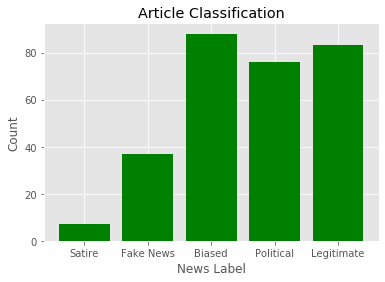

In [90]:
Rating_BarChart(data.Art14)

In [81]:
print("Mean Legitimacy")
print(" Conservatives: ",data_con.Art14.mean())
print(" Liberals: ",data_lib.Art14.mean())
print("    ",stats.ttest_ind(data_con.Art14, data_lib.Art14))
print(" Males: ",data_M.Art14.mean())
print(" Females: ",data_F.Art14.mean())
print("    ",stats.ttest_ind(data_M.Art14, data_F.Art14))

Mean Legitimacy
 Conservatives:  3.704225352112676
 Liberals:  3.5903614457831323
     Ttest_indResult(statistic=0.7317909172493829, pvalue=0.46502532324508006)
 Males:  3.5625
 Females:  3.75968992248062
     Ttest_indResult(statistic=-1.5245152415710121, pvalue=0.12848120306673194)


### Article 15: "Finding wonder and foreboding in the pathway of a total eclipse" (Political)

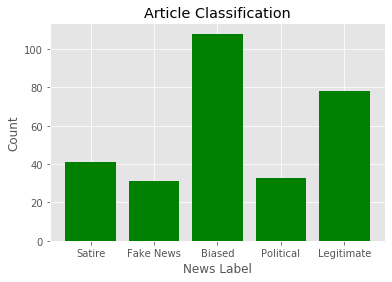

In [91]:
Rating_BarChart(data.Art15)

In [83]:
print("Mean Legitimacy")
print(" Conservatives: ",data_con.Art15.mean())
print(" Liberals: ",data_lib.Art15.mean())
print("    ",stats.ttest_ind(data_con.Art15, data_lib.Art15))
print(" Males: ",data_M.Art15.mean())
print(" Females: ",data_F.Art15.mean())
print("    ",stats.ttest_ind(data_M.Art15, data_F.Art15))

Mean Legitimacy
 Conservatives:  2.971830985915493
 Liberals:  3.4759036144578315
     Ttest_indResult(statistic=-2.7065899350521616, pvalue=0.007296557955772543)
 Males:  3.325
 Females:  3.186046511627907
     Ttest_indResult(statistic=0.8735453682730465, pvalue=0.3830962081373911)


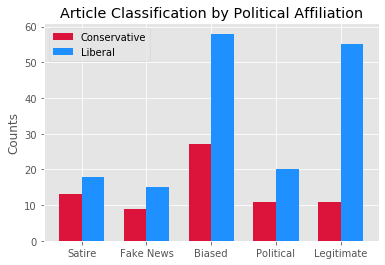

In [84]:
MultBarChart(data_con.Art15.value_counts(), data_lib.Art15.value_counts(), 'Conservative', 'Liberal', \
             'Article Classification by Political Affiliation')

### Article 16: "What Planned Parenthood’s Annual Report Proves" (Political)

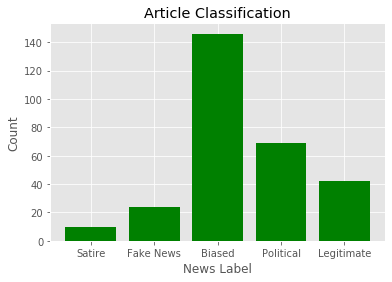

In [92]:
Rating_BarChart(data.Art16)

In [85]:
print("Mean Legitimacy")
print(" Conservatives: ",data_con.Art16.mean())
print(" Liberals: ",data_lib.Art16.mean())
print("    ",stats.ttest_ind(data_con.Art16, data_lib.Art16))
print(" Males: ",data_M.Art16.mean())
print(" Females: ",data_F.Art16.mean())
print("    ",stats.ttest_ind(data_M.Art16, data_F.Art16))

Mean Legitimacy
 Conservatives:  3.3661971830985915
 Liberals:  3.3313253012048194
     Ttest_indResult(statistic=0.26442145699560765, pvalue=0.7916869361644401)
 Males:  3.4
 Females:  3.3410852713178296
     Ttest_indResult(statistic=0.5237116789468274, pvalue=0.6008832532335613)


### Article 17: "Google’s New Fact-Check Feature Almost Exclusively Targets Conservative Sites" (Political)

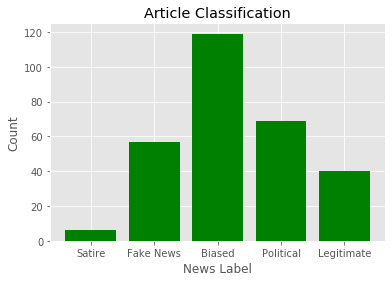

In [93]:
Rating_BarChart(data.Art17)

In [86]:
print("Mean Legitimacy")
print(" Conservatives: ",data_con.Art17.mean())
print(" Liberals: ",data_lib.Art17.mean())
print("    ",stats.ttest_ind(data_con.Art17, data_lib.Art17))
print(" Males: ",data_M.Art17.mean())
print(" Females: ",data_F.Art17.mean())
print("    ",stats.ttest_ind(data_M.Art17, data_F.Art17))

Mean Legitimacy
 Conservatives:  3.492957746478873
 Liberals:  3.1987951807228914
     Ttest_indResult(statistic=2.1144493812250738, pvalue=0.03553044458052569)
 Males:  3.31875
 Females:  3.2248062015503876
     Ttest_indResult(statistic=0.7936049110840115, pvalue=0.4280811059508225)


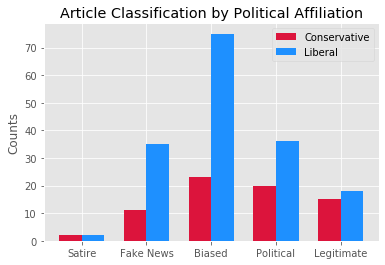

In [87]:
MultBarChart(data_con.Art17.value_counts(), data_lib.Art17.value_counts(), 'Conservative', 'Liberal', \
             'Article Classification by Political Affiliation')

### Article 18: "'Ghost Ship' With 8 Dead N. Koreans Washes Up in Japan During 'Unified Korea' Flag Announcement" (Legitimate)

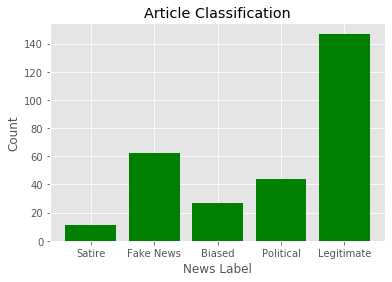

In [94]:
Rating_BarChart(data.Art18)

In [64]:
print("Mean Legitimacy")
print("Conservatives: ",data_con.Art18.mean())
print("Liberals: ",data_lib.Art18.mean())
print("    ",stats.ttest_ind(data_con.Art18, data_lib.Art18))
print("Males: ",data_M.Art18.mean())
print("Females: ",data_F.Art18.mean())
print("    ",stats.ttest_ind(data_M.Art18, data_F.Art18))

Mean Legitimacy
Conservatives:  3.8450704225352115
Liberals:  3.8313253012048194
     Ttest_indResult(statistic=0.07228376112754831, pvalue=0.9424375697062652)
Males:  3.93125
Females:  3.7906976744186047
     Ttest_indResult(statistic=0.8879234705768099, pvalue=0.37532543912446936)


### Article 19: "Hiding the Political Subtext of Sterling Trial" (Legitimate)

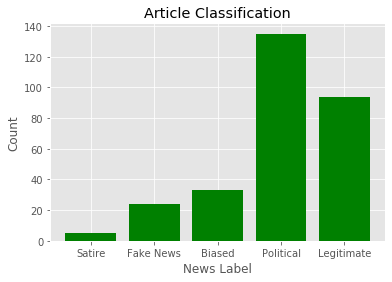

In [95]:
Rating_BarChart(data.Art19)

In [88]:
print("Mean Legitimacy")
print(" Conservatives: ",data_con.Art19.mean())
print(" Liberals: ",data_lib.Art19.mean())
print("    ",stats.ttest_ind(data_con.Art19, data_lib.Art19))
print(" Males: ",data_M.Art19.mean())
print(" Females: ",data_F.Art19.mean())
print("    ",stats.ttest_ind(data_M.Art19, data_F.Art19))

Mean Legitimacy
 Conservatives:  3.915492957746479
 Liberals:  4.054216867469879
     Ttest_indResult(statistic=-1.0110625291668864, pvalue=0.3130263763169803)
 Males:  3.8875
 Females:  4.131782945736434
     Ttest_indResult(statistic=-2.1576515655432624, pvalue=0.03178459409042932)


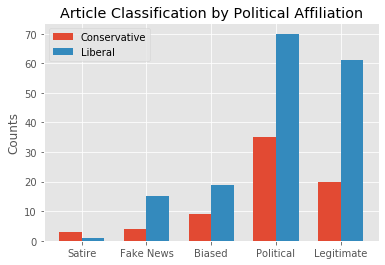

In [211]:
MultBarChart(data_con.Art19.value_counts(), data_lib.Art19.value_counts(), 'Conservative', 'Liberal', \
             'Article Classification by Political Affiliation')

In [50]:
print("Mean Legitimacy... Conservatives: ",data_con.Art19.mean(), "Liberals: ",data_lib.Art19.mean())
print(stats.ttest_ind(data_con.Art19, data_lib.Art19))

Mean Legitimacy... Conservatives:  3.915492957746479 Liberals:  4.054216867469879
Ttest_indResult(statistic=-1.0110625291668864, pvalue=0.3130263763169803)


### Article 20: "Facebook Lifts Ban on Paid Ads for Pro-Life Film Produced by MLK's Niece After Appeal" (Legitimate)

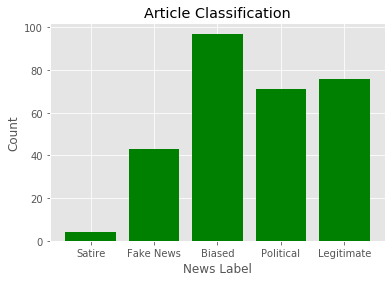

In [96]:
Rating_BarChart(data.Art20)

In [66]:
print("Mean Legitimacy")
print("Conservatives: ",data_con.Art20.mean())
print("Liberals: ",data_lib.Art20.mean())
print("    ",stats.ttest_ind(data_con.Art20, data_lib.Art20))
print("Males: ",data_M.Art20.mean())
print("Females: ",data_F.Art20.mean())
print("    ",stats.ttest_ind(data_M.Art20, data_F.Art20))

Mean Legitimacy
Conservatives:  3.7464788732394365
Liberals:  3.5180722891566263
     Ttest_indResult(statistic=1.5588936752915628, pvalue=0.12036721504912808)
Males:  3.59375
Females:  3.5736434108527133
     Ttest_indResult(statistic=0.15842856273012446, pvalue=0.8742305258515921)
